In [1]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
import missingno
import warnings
warnings.filterwarnings("ignore")

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

## EDA on the Automobile dataset
### 1. Summary. 

AUTOMOBILE DATASET. 
Exploratory data analysis is used to identify the features that have an impact on automobile pricing. This information is based on vehicles that are classified according to whether they are standard or turbocharged. It also establishes the risk factors, with 3 being the most dangerous and -1 being the safest.
This data set includes information about cars that was taken from the 1985 Ward's Automotive Yearbook (Cars).



In [2]:
# load dataset and create a dataframe
auto_df = pd.read_csv('automobile.txt')
auto_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


The missing values are denoted by "?". I am going to replace all the "?" to Not a Number values

### Data cleaning.

I am going to start by looking into the attributes of the data in detail before I  start making decisions on how I am going to clean it.

In the automobile dataset, missing data is denoted with a question mark "?". We replace "?" with NaN (Not a Number) value, which is the default missing value denoter.



In [3]:
# replace the question marks with a NaN value
auto_df.replace("?", np.nan, inplace = True)
auto_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [4]:
# check missing data per column
missing_data = auto_df.isnull().sum()
missing_data

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

There is very little missing data in our columns, making dropping most of the columns unwarranted. We can replace values with the average or frequency value or delete rows. I will delete rows for specific columns and replace for specific colums. 

##### Replace by mean:

"normalized-losses": 41 missing data, replace them with mean

"stroke": 4 missing data, replace them with mean

"bore": 4 missing data, replace them with mean

"horsepower": 2 missing data, replace them with mean

"peak-rpm": 2 missing data, replace them with mean





In [5]:
# use mean function to get average value
avg_normalized_loss = auto_df["normalized-losses"].astype("float").mean(axis=0)
# replace missing data with the value
auto_df["normalized-losses"].replace(np.nan,avg_normalized_loss,inplace=True)
# print the average value
print("Average of normalized-losses:", avg_normalized_loss)

Average of normalized-losses: 122.0


In [6]:
# use the mean function to get average bore value
avg_bore = auto_df["bore"].astype("float").mean(axis=0)
# replace missing values with the average bore value
auto_df["bore"].replace(np.nan,avg_bore,inplace=True)
# print average bore value
print("Average of Bore Values:",avg_bore)

Average of Bore Values: 3.3297512437810943


In [7]:
# use mean to get average stroke value
avg_stroke = auto_df["stroke"].astype("float").mean(axis=0)
# replace the missing stroke values with the average stroke value
auto_df["stroke"].replace(np.nan,avg_stroke,inplace = True)
# print average value
print("Average of Stroke Values:",avg_bore)

Average of Stroke Values: 3.3297512437810943


In [8]:
# use mean function to get average peak rpm
avg_peakrpm=auto_df['peak-rpm'].astype('float').mean(axis=0)
# replace the missing rpm with the average one
auto_df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)
# print average peak rpm
print("Average peak rpm:", avg_peakrpm)

Average peak rpm: 5125.369458128079


##### Replace by frequency

"num-of-doors": 2 missing data, replace them with "four".
Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur

In [9]:
# get the highets frequency using idxmax
auto_df['num-of-doors'].value_counts().idxmax()

'four'

In [10]:
#replace the missing 'num-of-doors' values by the most frequent 
auto_df['num-of-doors'].replace(np.nan,"four",inplace=True)

##### Drop the whole row:

"price": 4 rows lacking data, just delete the rows

Reason: We want to look at the factors affecting the price. Every data entry without price information cannot be used for prediction, hence any row without price information is useless to us at this time.

In [11]:
# simply drop whole row with NaN in "price" column
auto_df.dropna(subset=["price"],axis=0,inplace=True)
auto_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [12]:
# view data types
auto_df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Certain columns have incorrect data types. Variables with numbers should be of type "float" or "int," while variables containing strings, like categories, should be of type "object." For instance, the variables "bore" and "stroke" are numerical descriptions of the engines, so we would anticipate that they would be of type "float" or "int," but they are displayed as being of type "object". Using the "astype()" technique, we must transform data types into the appropriate format for each column.

In [13]:
auto_df[["bore", "stroke"]] = auto_df[["bore", "stroke"]].astype("float")
auto_df[["normalized-losses"]] = auto_df[["normalized-losses"]].astype("int")
auto_df[["price"]] = auto_df[["price"]].astype("float")
auto_df[["peak-rpm"]] = auto_df[["peak-rpm"]].astype("float")

## Data visualization

### Frequency visualizations. 

This visualization models is to tell stories on frequency, in our categorical data from the dataset. 

##### Make frequency

The visualization shows that Toyota has more occurences in the dataset and Mercury has the least. Considering that the dataset is from 1985, mercury having one occurence makes sense as the brand has been discontinued. 

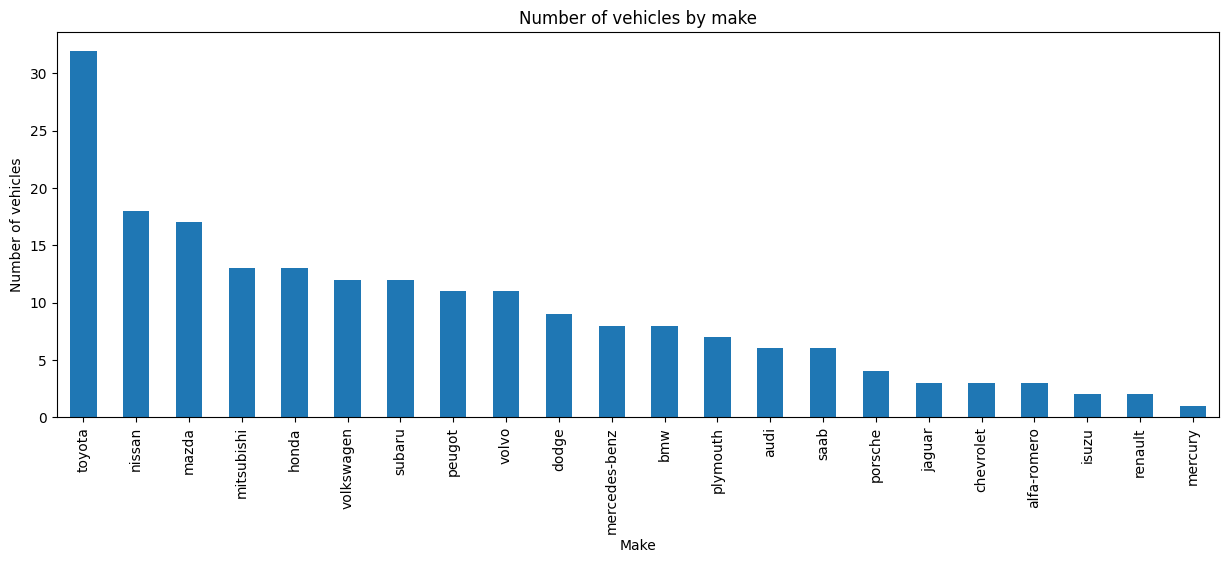

In [14]:
auto_df.make.value_counts().plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make');


The visualization shows that Toyota has more occurences in the dataset and Mercury has the least. Considering that the dataset is from 1985, mercury having one occurence makes sense as the brand has been discontinued. 

##### Engine type frequency

In [15]:
auto_df['engine-type'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf'], dtype=object)

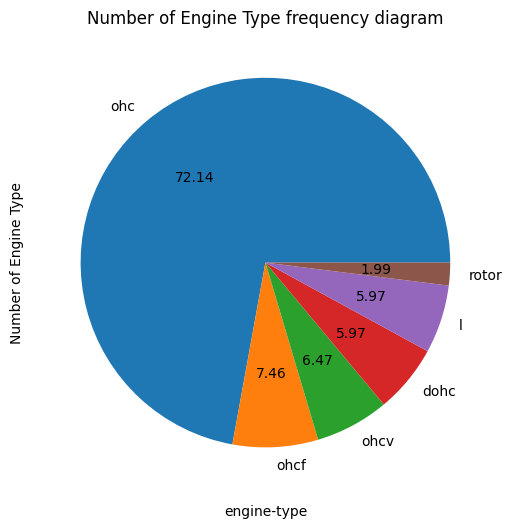

In [16]:
auto_df['engine-type'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Number of Engine Type frequency diagram")
plt.ylabel('Number of Engine Type')
plt.xlabel('engine-type');


The visualization shows that OHC has more occurences in the dataset and rotor has the least. OHC engines are a lot more preferred because it has more power than the other engine types in the database. OHC engines tend to be able to rev higher mostly due to the significantly lower valve train weight which makes for greatly improved valve control and higher potential RPM before float occurs. OHV engines have pushrods and relatively heavy rockers as opposed to OHC which does away with that.

Reference: https://mechanics.stackexchange.com/questions/27897/merits-and-demerits-of-ohv-vs-ohc

##### Body type frequency

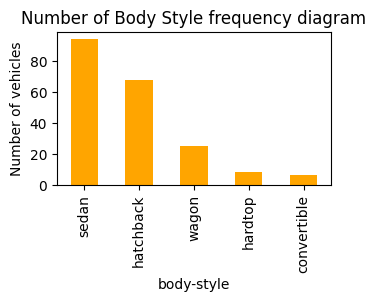

In [17]:
plt.subplot(224)
auto_df['body-style'].value_counts().plot(kind='bar',color='orange')
plt.title("Number of Body Style frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('body-style');
plt.tight_layout()
plt.show()

The visualization shows that Sedam has more occurences in the dataset than the other car types. Considering that the data is from a 1985 year book, this would make sense because it has changed with times. Hatchbacks are now considered more practical than sedans as they offer more boot space and fuel effeciency. 

### Price visualization

#### Price and body style

<AxesSubplot: xlabel='body-style', ylabel='price'>

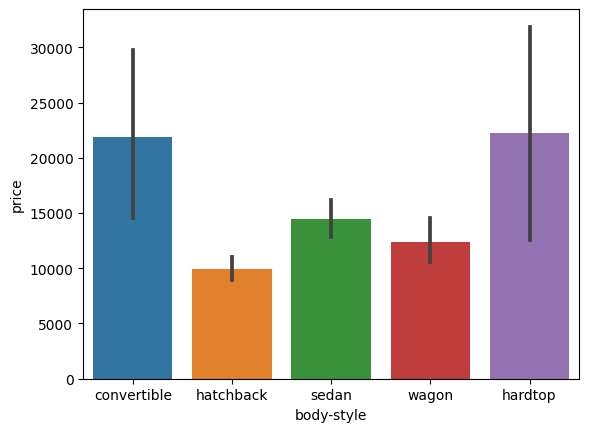

In [18]:
sns.barplot(x="body-style", y="price", data=auto_df)

The most expensive body styles are hardtop, followed by convertible and sedan. 

#### Price and Make 

<AxesSubplot: xlabel='make', ylabel='price'>

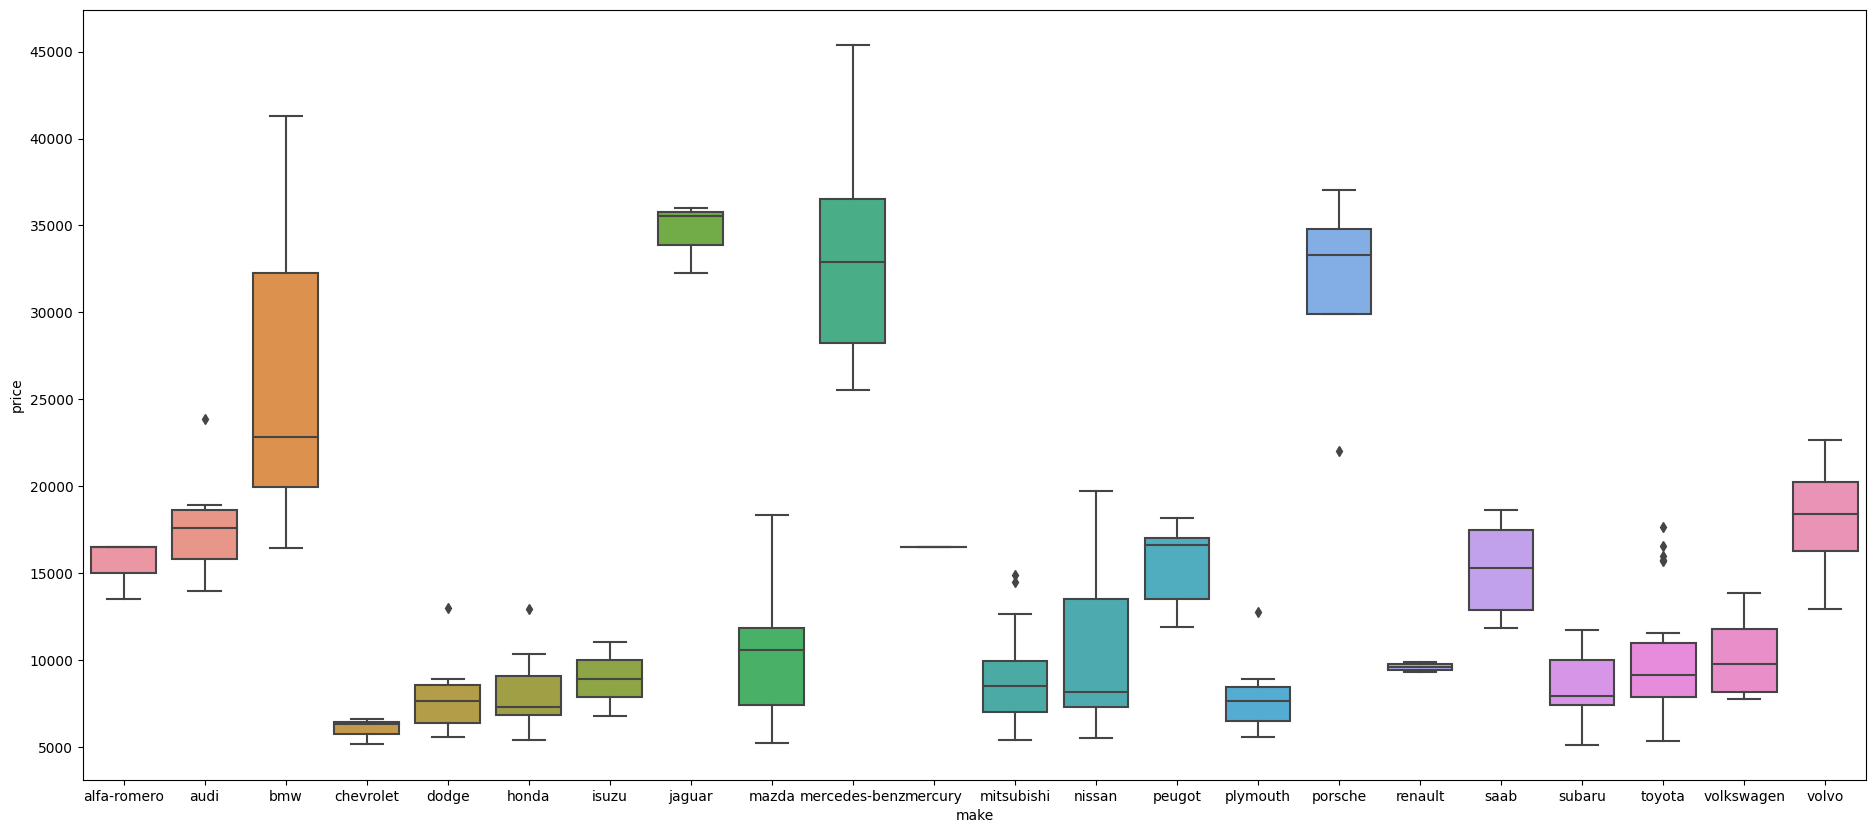

In [19]:
plt.rcParams['figure.figsize']=(23,10)
sns.boxplot(x="make", y="price", data=auto_df)

The least costly cars are made by Chevrolet, and the most expensive made by Mercedes-Benz. The luxury cars costing more than 20,000 are made by BMW, Jaguar, Mercedes-Benz, and Porsche.
Chevrolet, Dodge, Honda, Mitsubishi, Plymoth, and Subaru are the least expensive vehicles, with prices under 10,000. The majority of other vehicles are in the intermediate, between 10,000 and 20,000. 

#### Price and drive wheels

<AxesSubplot: xlabel='drive-wheels', ylabel='price'>

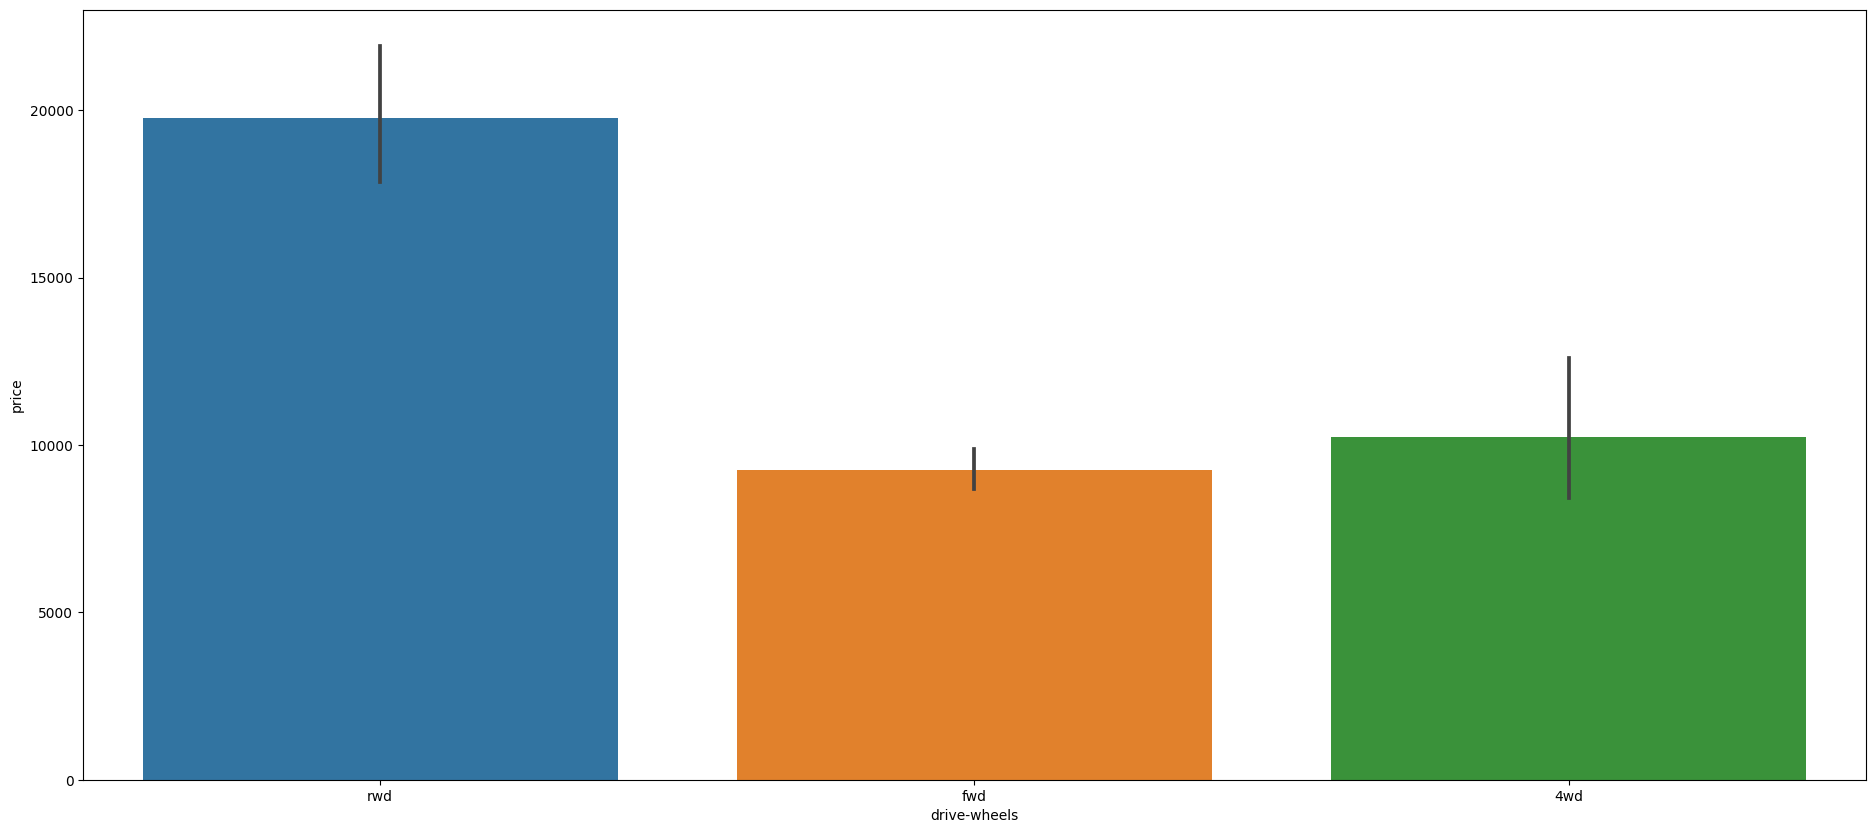

In [20]:
sns.barplot(x="drive-wheels", y="price", data=auto_df)

It is clear that rear-wheel drive vehicles are less expensive than real-wheel drive vehicles. Cars with four wheels drive are slightly more expensive than those with front wheels. Since there are so few four-wheel drive vehicles in our dataset, the picture may not be entirely true.

### Normalized losses visualizations

#### Normalized losses and body type

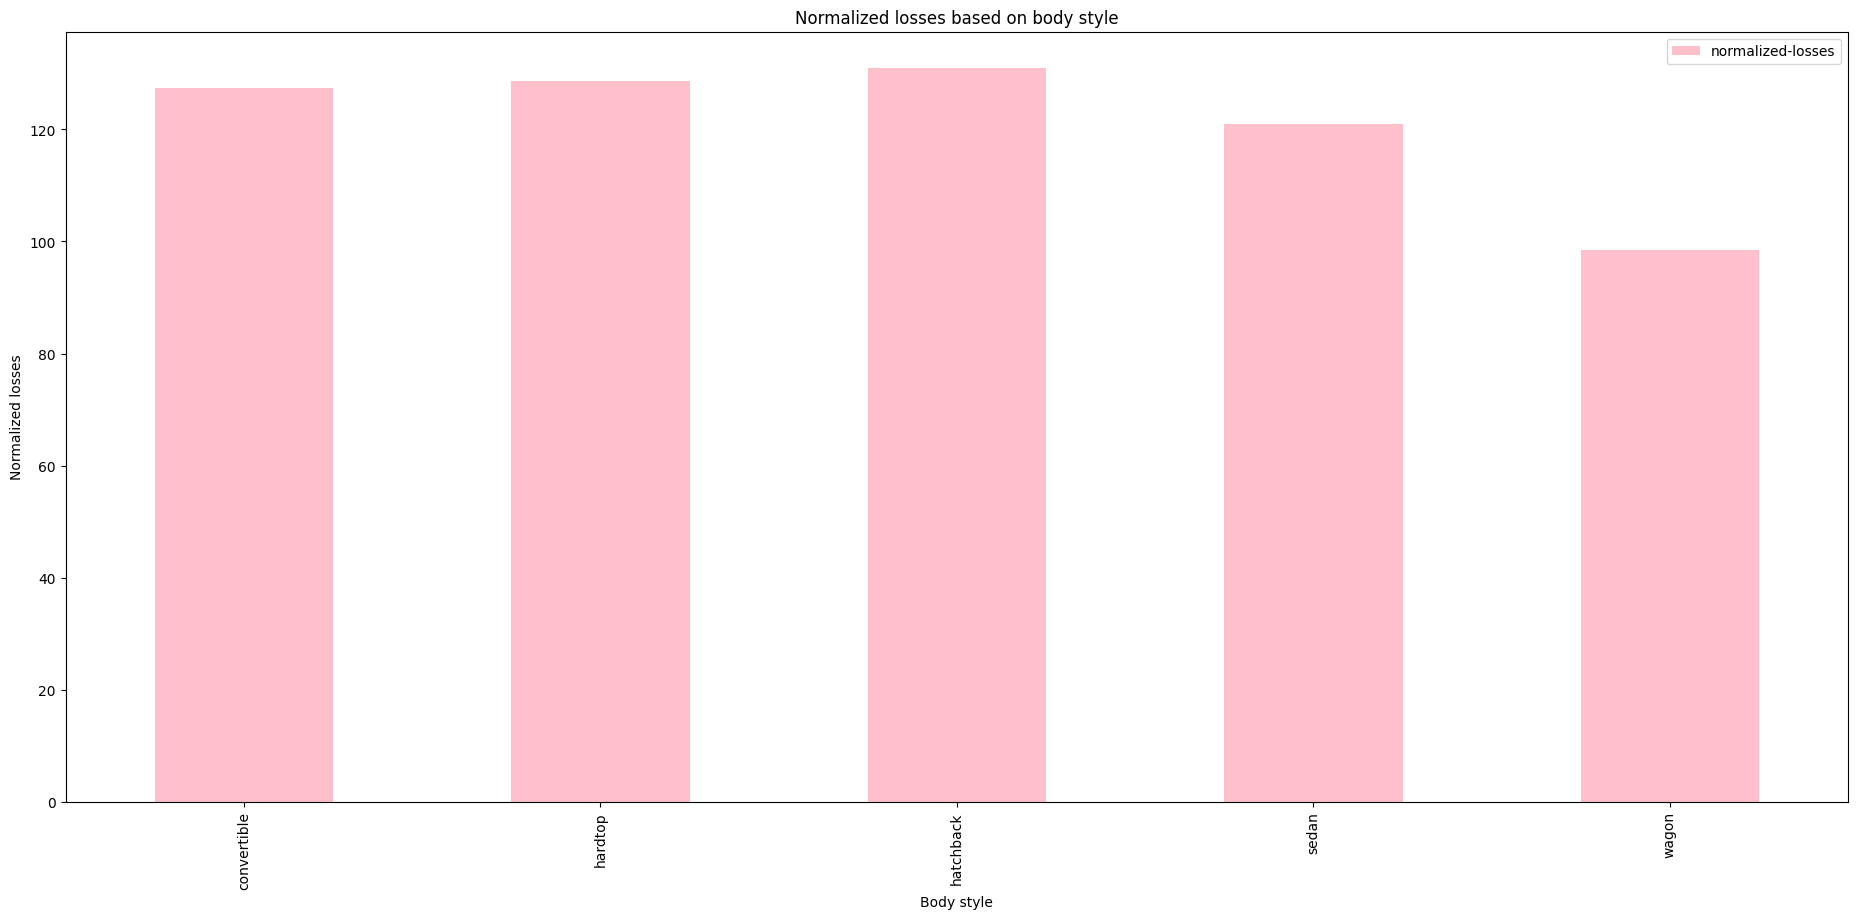

In [21]:
pd.pivot_table(auto_df,index=['body-style'], values='normalized-losses').plot(kind='bar',color='pink')
plt.title("Normalized losses based on body style")
plt.ylabel('Normalized losses')
plt.xlabel('Body style');

#### Normalized losses and symboling

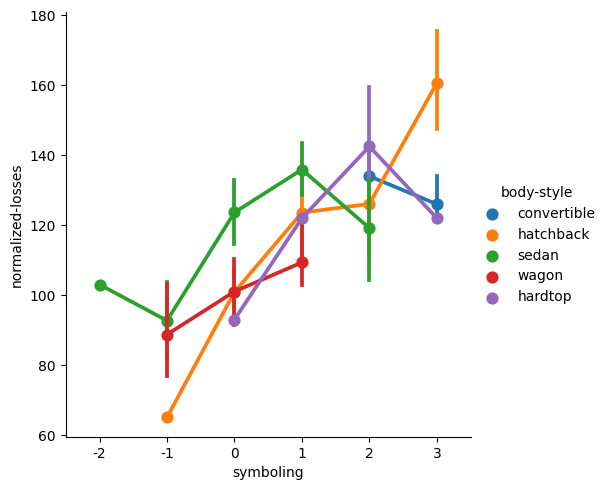

In [22]:
sns.catplot(data=auto_df, y="normalized-losses", x="symboling" , hue="body-style" ,kind="point")

Important to remember:  +3 denotes a risky car and -2, a safe vehicle.
The normalized losses in the vehicle grow linearly with an increase in risk rating. Most losses for covertible and hardtop 
vehicles have a risk rating above 0. Hatchback vehicles have the highest risk of loss ratings. Sedan and Wagon have losses
despite having a safer grade for risk.